# Testing the Discrete Differentiation Method

In [1]:
import crosspower as cp
import FisherCl2 as fcl
from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [2]:
# reload any changes that have been made to crosspower.py
reload(cp)
reload(fcl.cp)
reload(fcl)

<module 'FisherCl2' from 'FisherCl2.pyc'>

# Start with varying the sum of neutrino masses
Want to match Figure 2 from Wu et. al. (2014)

In [3]:
# get some matter power interpolation objects
nh = 'normal'
nmn = 3
mnu0 =   0.0
mnu1 =  50e-3
mnu2 = 100e-3
mnu3 = 150e-3
labels = ['50 meV','100 meV','150 meV']
#mnu1 = 0.1
#mnu2 = 0.2
#mnu3 = 0.3
#labels = ['100 meV','200 meV','300 meV']
nonlinear = False # halofit

In [4]:
# adjust CDM density to accomodate extra neutrino mass; keep constant Omega_c + Omega_nu for all cases
def omnh2(mnu):
    """
    eqn. 12 from Wu et. al. 2014,
    attributed to Mangano et. al. 2005
    Input: 
        mnu: sum of mass of neutrinos in eV
    Returns:
        Omega_nu*h**2
    """
    return mnu/94

omnh2_1 = omnh2(mnu1)
omnh2_2 = omnh2(mnu2)
omnh2_3 = omnh2(mnu3)
omnh2_06 = omnh2(0.06) # used by Planck

omch2 = 0.1193 # Planck

omch2_0 = omch2+omnh2_06
omch2_1 = omch2+omnh2_06-omnh2_1
omch2_2 = omch2+omnh2_06-omnh2_2
omch2_3 = omch2+omnh2_06-omnh2_3

print omch2_0
print omch2_1
print omch2_2
print omch2_3

0.119938297872
0.119406382979
0.118874468085
0.118342553191


In [5]:
print 'starting myPk0...'
#myPk0 = cp.matterPower(neutrino_hierarchy='degenerate',num_massive_neutrinos=0  ,mnu=mnu0,omch2=omch2_0)
myPk0 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=0,  mnu=mnu0,omch2=omch2_0,nonlinear=nonlinear)
print 'starting myPk1...'
myPk1 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=nmn,mnu=mnu1,omch2=omch2_1,nonlinear=nonlinear)
print 'starting myPk2...'
myPk2 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=nmn,mnu=mnu2,omch2=omch2_2,nonlinear=nonlinear)
print 'starting myPk3...'
myPk3 = cp.matterPower(neutrino_hierarchy=nh,num_massive_neutrinos=nmn,mnu=mnu3,omch2=omch2_3,nonlinear=nonlinear)

starting myPk0...
zs.size:  998
starting myPk1...
zs.size:  998
starting myPk2...
zs.size:  998
starting myPk3...
zs.size:  998


In [6]:
# or try with degenerate
#myPk0 = cp.matterPower(neutrino_hierarchy='degenerate',num_massive_neutrinos=0,mnu=mnu0,omch2=omch2_0)

In [7]:
# try matter power spectra ratios
kSpectrum = np.logspace(-3.7,1.0,1000)
#print kSpectrum
myZ = 0
PKinterp0 = myPk0.PK
PKinterp1 = myPk1.PK
PKinterp2 = myPk2.PK
PKinterp3 = myPk3.PK
Pk0 = PKinterp0.P(myZ,kSpectrum)
Pk1 = PKinterp1.P(myZ,kSpectrum)
Pk2 = PKinterp2.P(myZ,kSpectrum)
Pk3 = PKinterp3.P(myZ,kSpectrum)
print 'sizes: ',kSpectrum.size,Pk0.size,Pk1.size,Pk2.size,Pk3.size

sizes:  1000 1000 1000 1000 1000


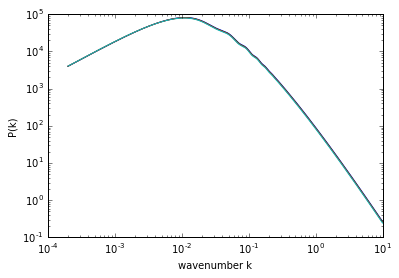

In [8]:
plt.loglog(kSpectrum,Pk0)
plt.loglog(kSpectrum,Pk1)
plt.loglog(kSpectrum,Pk2)
plt.loglog(kSpectrum,Pk3)
plt.xlabel('wavenumber k')
plt.ylabel('P(k)')
plt.show();

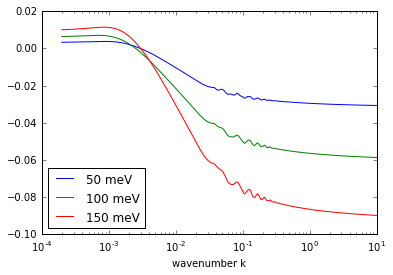

In [9]:
Pks = (Pk1,Pk2,Pk3)
for pkNum in range(3):
    t = (Pks[pkNum]-Pk0)/Pk0
    plt.semilogx(kSpectrum,t,label=labels[pkNum])
plt.xlabel('wavenumber k')
plt.legend(loc='lower left')
plt.show();

In [10]:
# use them to create power spectra
ls0,Cl0 = cp.getCl(myPk0)
ls1,Cl1 = cp.getCl(myPk1)
ls2,Cl2 = cp.getCl(myPk2)
ls3,Cl3 = cp.getCl(myPk3)

window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : kappa  0


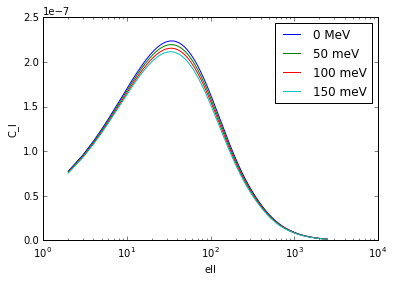

In [11]:
# plot power spectra
Cls = [Cl1,Cl2,Cl3]
plt.semilogx(ls0,Cl0,label='0 MeV')
for massNum in range(3):
    plt.semilogx(ls0,Cls[massNum],label=labels[massNum])
plt.xlabel('ell')
plt.ylabel('C_l')
plt.legend()
plt.show()

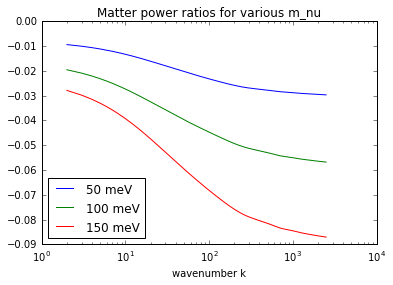

In [12]:
# plot Delta Cl / Cl
for massNum in range(3):
    plt.semilogx(ls0,(Cls[massNum]-Cl0)/Cl0,label=labels[massNum])
plt.legend(loc='lower left')
plt.xlabel('wavenumber k')
plt.title('Matter power ratios for various m_nu')
plt.show();

In [13]:
# check CAMB parameters
import camb
#pars = camb.CAMBparams()
#pars.set_cosmology()
#pars.set_dark_energy()
pars = myPk0.getPars()
#pars.set_matter_power(k_per_logint = 10)
#help(pars)
#print pars

zmax:  1019.86225059


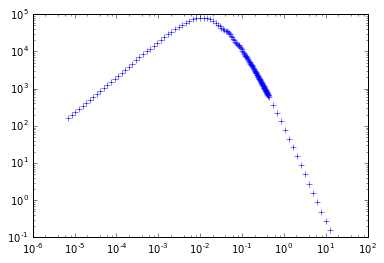

In [14]:
# check z,k values of Pk interpolator
myVar = camb.model.Transfer_tot
k_per_logint = None
nonlinear = False
zmax = myPk0.zs[-1]
print 'zmax: ',zmax 
Pk, z, k = camb.get_matter_power_interpolator(pars,nonlinear=nonlinear,hubble_units=False,k_hunit=False,
                                              kmax=10,k_per_logint=k_per_logint,var1=myVar,var2=myVar,
                                              zmax=zmax,return_z_k=True)
PofK = Pk.P(0,k)
plt.loglog(k,PofK,'b+')
plt.show();

In [15]:
pars = camb.CAMBparams()
#help(pars)
help(pars.InitPower.set_params)

Help on method set_params in module camb.initialpower:

set_params(self, As=2e-09, ns=0.96, nrun=0, nrunrun=0, r=0, nt=None, ntrun=0, pivot_scalar=0.05, pivot_tensor=0.05, parameterization=2) method of camb.initialpower.InitialPowerParams instance
    Set parameters using standard power law parameterization. If nt=None, uses inflation consistency relation.
    
    :param As: comoving curvature power at k=piveo_scalar
    :param ns: scalar spectral index
    :param nrun: running of scalar spectral index d n_s/d log k
    :param nrunrun: running of running of spectral index
    :param r: tensor to scalar ratio at pivot
    :param nt: tensor spectral index. If None, set using inflation consistency
    :param ntrun: running of tensor spectral index
    :param pivot_scalar: pivot scale for scalar spectrum
    :param pivot_tensor:  pivot scale for tensor spectrum
    :param parameterization: See CAMB notes. One of
        - tensor_param_indeptilt = 1
        - tensor_param_rpivot = 2
      

In [16]:
paramList=['as','re','tw']
paramList.append('ex'+str(34))
print paramList

['as', 're', 'tw', 'ex34']


# Do some testing with discrete differentiation

In [17]:
# get a Fisher Matrix object using new version FisherCl2
reload(fcl)
Fobj = fcl.FisherMatrix(zmax=4,nBins=8)

creating matter power spectrum object...
zs.size:  998
creating more matter power objects...
creating matter power spectra for  ombh2  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  omch2  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  cosmomc_theta  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  As  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  ns  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  tau  derivative...
zs.size:  998
zs.size:  998
creating matter power spectra for  mnu  derivative...
zs.size:  998
zs.size:  998
fiducial bs:  [ 1.31336283  1.66697151  2.06888487  2.48113088  2.89695688  3.31442616
  3.73278304  4.15167301]
fiducial As:  [ 1.00205877  1.00134013  1.00118993  1.00112731  1.00109399  1.00107367
  1.00106014  1.00105055]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
w

In [22]:
sigmas = np.sqrt(np.diag(np.linalg.inv(Fobj.Fij)))
print Fobj.paramList
print sigmas
print Fobj.paramList[6]
print sigmas[6]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8']
[  1.99390828e-04   7.39889930e-04   8.74015861e-06   1.26383785e-11
   2.25479424e-03   1.35463366e+00   3.19616763e-03   1.84852377e-03
   1.75112824e-03   2.51996195e-03   1.84119551e-03   2.53594120e-03
   3.28137664e-03   4.10577402e-03   4.94957370e-03]
mnu
0.00319616763145


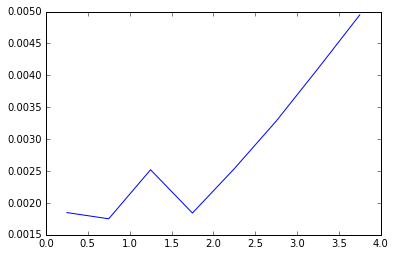

In [23]:
zs = Fobj.getBinCenters()
sigmaBs = sigmas[7:]
plt.plot(zs,sigmaBs)
plt.show();

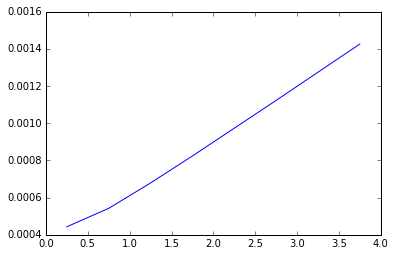

In [35]:
# why the bump?  Check just the b_i portion
sigmasBonly = np.sqrt(np.diag(np.linalg.inv(Fobj.Fij[7:,7:])))
plt.plot(zs,sigmasBonly)
plt.show();

creating matter power spectrum object...
zs.size:  998
fiducial bs:  [ 1.31336283  1.66697151  2.06888487  2.48113088  2.89695688  3.31442616
  3.73278304  4.15167301]
fiducial As:  [ 1.00205884  1.00134017  1.00118995  1.00112732  1.00109399  1.00107368
  1.00106014  1.00105056]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 
window  1 : kappa  0
window  2 : galaxies  1
starting angular cross power spectrum  0 ,  2 ... 
window  1 : kappa  0
window  2 : galaxies  2
starting angular cross power spectrum  0 ,  3 ... 
window  1 : kappa  0
window  2 : galaxies  3
starting angular cross power spectrum  0 ,  4 ... 
window  1 : kappa  0
window  2 : galaxies  4
starting angular cross power spectrum  0 ,  5 ... 
window  1 : kappa  0
window  2 : galaxies  5
starting angular cross power spectrum  0 ,  6 ... 
window  1 : kappa  0
window  2 : galaxies  6
startin

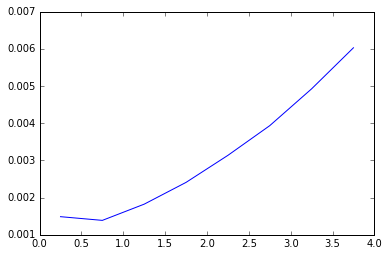

In [25]:
# why the bump?  Try with other Fcl version
import FisherCl as fcl0
Fobj0 = fcl0.FisherMatrix(zmax=4,nBins=8)
zs0 = Fobj0.getBinCenters()
sigmasA0,sigmasB0 = Fobj0.getSigmas()
plt.plot(zs0,sigmasB0)
plt.show()

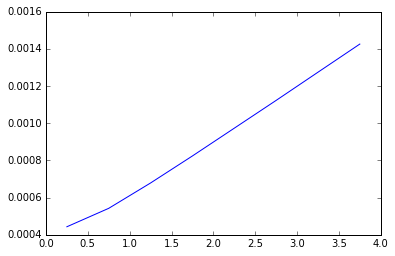

In [37]:
# Check just the b_i version
sigmasB0only = np.sqrt(np.diag(np.linalg.inv(Fobj0.Fij[8:,8:])))
plt.plot(zs,sigmasB0only)
plt.show();

creating matter power spectrum object...
zs.size:  998
fiducial bs:  [ 1.31336283  1.66697151  2.06888487  2.48113088  2.89695688  3.31442616
  3.73278304  4.15167301]
fiducial As:  [ 1.00205884  1.00134017  1.00118995  1.00112732  1.00109399  1.00107368
  1.00106014  1.00105056]
starting cross power with entire kappa... 
starting angular cross power spectrum  0 ,  0 ... 
window  1 : kappa  0
window  2 : kappa  0
starting angular cross power spectrum  0 ,  1 ... 
window  1 : kappa  0
window  2 : galaxies  1
starting angular cross power spectrum  0 ,  2 ... 
window  1 : kappa  0
window  2 : galaxies  2
starting angular cross power spectrum  0 ,  3 ... 
window  1 : kappa  0
window  2 : galaxies  3
starting angular cross power spectrum  0 ,  4 ... 
window  1 : kappa  0
window  2 : galaxies  4
starting angular cross power spectrum  0 ,  5 ... 
window  1 : kappa  0
window  2 : galaxies  5
starting angular cross power spectrum  0 ,  6 ... 
window  1 : kappa  0
window  2 : galaxies  6
startin

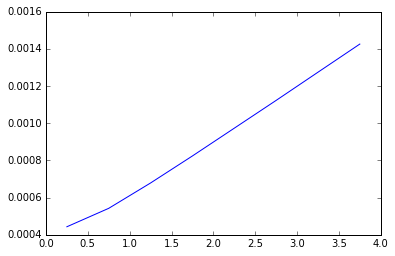

In [34]:
#Well, I really should have done that with fixed As.
Fobj1 = fcl0.FisherMatrix(zmax=4,nBins=8,noAs=True)
zs1 = Fobj1.getBinCenters()
#sigmasA1,sigmasB1 = Fobj1.getSigmas()
sigmasB1 = np.sqrt(np.diag(np.linalg.inv(Fobj1.Fij[8:,8:])))
plt.plot(zs1,sigmasB1)
plt.show()

In [60]:
# save and load some Fisher Matrix data
reload(fcl)
filename='myFish.npz'
fcl.saveFish(Fobj,filename=filename)
x,y,z = fcl.loadFish(filename)

dx, dy, p:  62417.2500662 2491.94984702 -0.728734656867
fid0, fid1:  0.1193 0.06
var0, var1:  omch2 mnu


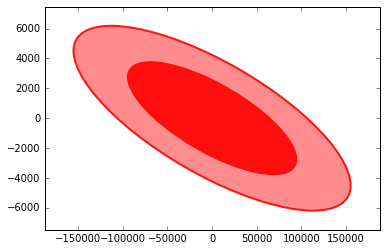

In [78]:
# plot error ellipses!
reload(fcl)
myFish = fcl.Fisher(filename)
#select parameters
p0=1
p1=6
dx,dy,p = myFish.dxdyp(p0,p1)
print 'dx, dy, p: ',dx,dy,p
print 'fid0, fid1: ',myFish.paramVals[p0],myFish.paramVals[p1]
print 'var0, var1: ',myFish.paramList[p0],myFish.paramList[p1]
myFish.twoParamConf(p0,p1)